In [8]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("datasets/youtube_cleaned.csv")
reddit_df = pd.read_csv("datasets/reddit_cleaned.csv")
youtube_df = pd.read_csv("datasets/youtube_cleaned.csv")


In [9]:
youtube_df.head()

,id,parent_id,text,author,views,likes,datetime,event,year,date,clean_text
0,3VoaJdO6wDo,NaN,2022 FIFA World Cup nostalgia…,UCpcTrCXblq78GZrTUTLWeBw,435903.0,25980.0,2024-11-20 14:30:02,World Cup,2022,2024-11-20,fifa world cup nostalgia
1,UgywnEw50L83QU7llaJ4AaABAg,3VoaJdO6wDo,🇶🇦 ⚽,@PodcastPedia-e3p,NaN,0.0,2025-05-25 18:31:52,World Cup,2022,2025-05-25,NaN
2,UgzkJxlJogFoyOKCijt4AaABAg,3VoaJdO6wDo,"Chora não galera, falta 1 ano só para a próxim...",@Enzinho_49,NaN,1.0,2025-05-24 23:20:52,World Cup,2022,2025-05-24,chora galera falta ano para prxima copa
3,UgwB2kjDxHhiAQcR3Fh4AaABAg,3VoaJdO6wDo,Crazy World Cup bro… I remember me and my frie...,@HelenahanyingWu,NaN,0.0,2025-05-24 18:39:25,World Cup,2022,2025-05-24,crazy world cup bro remember friend celebratin...
4,UgyjTPbOhjCYslbpF694AaABAg,3VoaJdO6wDo,dn i missed when matches was doing this intro 😢,@sariff4059,NaN,0.0,2025-05-24 16:40:30,World Cup,2022,2025-05-24,missed match intro


In [10]:

unique_count = reddit_df['author'].nunique()
author_row_count = reddit_df['author'].count()
nan_count = reddit_df['author'].isna().sum()
print("Number of unique authors:", unique_count)
print("Number of total entries:", author_row_count)
print("Number of NaN values in 'author' column:", nan_count)

Number of unique authors: 49597
Number of total entries: 85463
Number of NaN values in 'author' column: 14184


In [11]:

unique_count = df['author'].nunique()
author_row_count = df['author'].count()
nan_count = df['author'].isna().sum()
print("Number of unique authors:", unique_count)
print("Number of total entries:", author_row_count)
print("Number of NaN values in 'author' column:", nan_count)

Number of unique authors: 79970
Number of total entries: 98760
Number of NaN values in 'author' column: 30


In [12]:
# Combine dfs
combined_df = pd.concat([reddit_df, youtube_df], ignore_index=True)

# Calculate total and unique authors for Olympics and World Cup
total_authors_by_event = combined_df.groupby('event')['author'].count()
unique_authors_by_event = combined_df.groupby('event')['author'].nunique()

# Combine into one DataFrame
authors_summary_df = pd.DataFrame({
    'Total Authors': total_authors_by_event,
    'Unique Authors': unique_authors_by_event
})

# Calculate and round percentage of unique authors
authors_summary_df['% Unique'] = (authors_summary_df['Unique Authors'] / authors_summary_df['Total Authors']) * 100
authors_summary_df['% Unique'] = authors_summary_df['% Unique'].round(2)

# Print the result
print(authors_summary_df)


           Total Authors  Unique Authors  % Unique
event                                             
Olympics           93580           67950     72.61
World Cup          90643           63004     69.51


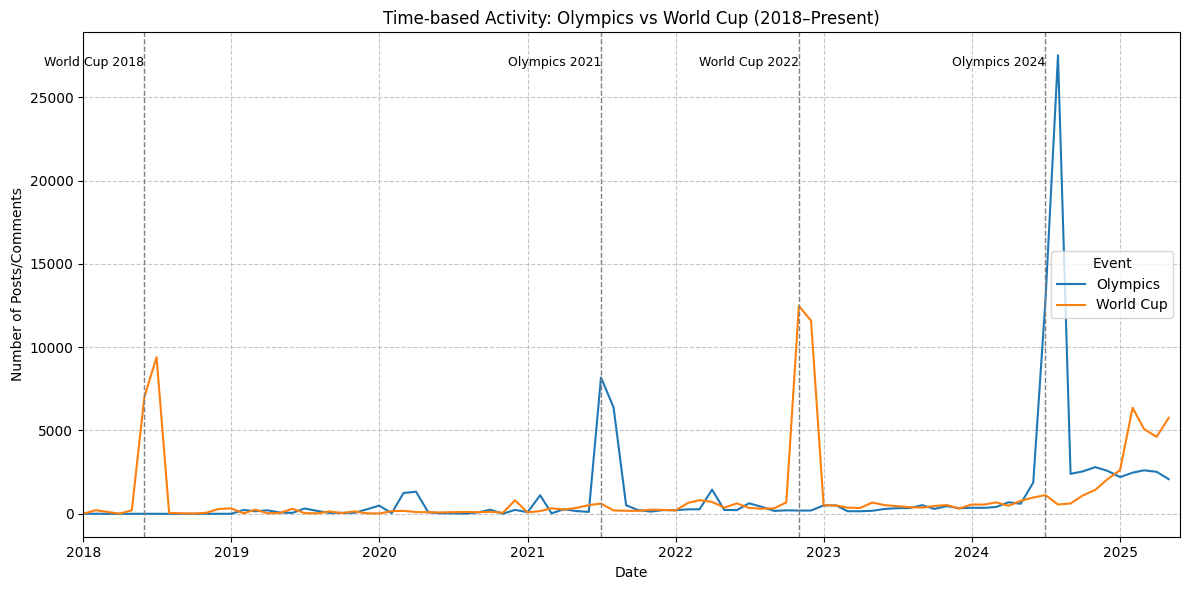

Olympics total: 98271
World Cup total: 94077


In [13]:
# Convert 'date' to datetime and create 'month'
combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')
combined_df['month'] = combined_df['date'].dt.to_period('M')


filtered_df = combined_df.copy()

# Group by month and event
time_activity = filtered_df.groupby(['month', 'event']).size().unstack(fill_value=0)
time_activity.index = time_activity.index.to_timestamp()
time_activity = time_activity[(time_activity.index >= '2018-01-01')]

# Plot actual post/comment counts
plt.figure(figsize=(12, 6))
for event in time_activity.columns:
    plt.plot(time_activity.index, time_activity[event], label=event)

# Add vertical event lines + horizontal labels
event_dates = {
    'World Cup 2018': '2018-06',
    'Olympics 2021': '2021-07',
    'World Cup 2022': '2022-11',
    'Olympics 2024': '2024-07'
}

for label, date in event_dates.items():
    x = pd.to_datetime(date)
    plt.axvline(x, color='gray', linestyle='--', linewidth=1)
    plt.text(x, plt.ylim()[1]*0.95, label, rotation=0, verticalalignment='top', horizontalalignment='right', fontsize=9)

plt.title('Time-based Activity: Olympics vs World Cup (2018–Present)')
plt.xlabel('Date')
plt.ylabel('Number of Posts/Comments')
plt.xlim(pd.Timestamp('2018-01-01'), pd.Timestamp.today())
plt.legend(title='Event')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Olympics total:", time_activity['Olympics'].sum())
print("World Cup total:", time_activity['World Cup'].sum())
